## 네이버 금융 일별 시세페이지 분석

In [11]:
index_cd = 'KPI200'
page_n = 1 
naver_index = 'https://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n) 

## 크롤링

In [12]:
from urllib.request import urlopen
source = urlopen(naver_index).read()
source

b'\n\n\n\n\n\n\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>\xb3\xd7\xc0\xcc\xb9\xf6 \xb1\xdd\xc0\xb6</title>\n<link rel="stylesheet" type="text/css" href="/css/newstock.css?20200720195029">\n<link rel="stylesheet" type="text/css" href="/css/common.css?20200720195029">\n<link rel="stylesheet" type="text/css" href="/css/layout.css?20200720195029">\n<link rel="stylesheet" type="text/css" href="/css/main.css?20200720195029">\n<link rel="stylesheet" type="text/css" href="/css/newstock2.css?20200720195029">\n<link rel="stylesheet" type="text/css" href="/css/newstock3.css?20200720195029">\n<link rel="stylesheet" type="text/css" href="/css/world.css?20200720195029">\n</head>\n<body>\n<script type="text/javascript" src="/js/jindo.min.ns.1.5.3.euckr.js?20200720195029"></script>\n<script type="text/javascript" src="/js/lcslog.js?20200720195029"></script>\n\t\t\t\t<!-- \xc0\xcf\xba\xb0\xbd\xc3\xbc\xbc -->\n\t\t\t\t<div class="box_type_m">

In [13]:
import bs4

In [14]:
source = bs4.BeautifulSoup(source, 'lxml')

In [15]:
print(source.prettify())

<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   네이버 금융
  </title>
  <link href="/css/newstock.css?20200720195029" rel="stylesheet" type="text/css"/>
  <link href="/css/common.css?20200720195029" rel="stylesheet" type="text/css"/>
  <link href="/css/layout.css?20200720195029" rel="stylesheet" type="text/css"/>
  <link href="/css/main.css?20200720195029" rel="stylesheet" type="text/css"/>
  <link href="/css/newstock2.css?20200720195029" rel="stylesheet" type="text/css"/>
  <link href="/css/newstock3.css?20200720195029" rel="stylesheet" type="text/css"/>
  <link href="/css/world.css?20200720195029" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <script src="/js/jindo.min.ns.1.5.3.euckr.js?20200720195029" type="text/javascript">
  </script>
  <script src="/js/lcslog.js?20200720195029" type="text/javascript">
  </script>
  <!-- 일별시세 -->
  <div class="box_type_m">
   <h4 class="top_tlt" style="text-align:left;">
    <em>
   

## 날짜 추출하기

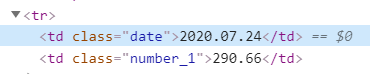

In [16]:
td = source.find_all('td')
len(td)

54

In [17]:
# 날짜 xpath : /html/body/div/table[1]/tbody/tr[3]/td[1]

- 주의 : xpath는 숫자를 1부터 카운트 그러므로 -1 해줘야됨

In [18]:
source.find_all('table')[0].find_all('tr')[2].find_all('td')[0]

<td class="date">2020.07.24</td>

In [19]:
d = source.find_all('td',class_='date')[0].text

In [20]:
d

'2020.07.24'

## date 타입 변경

In [21]:
import datetime as dt

In [22]:
full_date = d.split('.')
full_date

['2020', '07', '24']

In [23]:
yyyy = int(full_date[0])
mm = int(full_date[1])
dd = int(full_date[2])
this_date = dt.date(yyyy,mm,dd)
this_date

datetime.date(2020, 7, 24)

In [25]:
def date_format(d):
    d = str(d).replace('-','.')
    full_date = d.split('.')
    yyyy = int(full_date[0])
    mm = int(full_date[1])
    dd = int(full_date[2])
    this_date = dt.date(yyyy,mm,dd)
    
    return this_date

In [26]:
date_format(d)

datetime.date(2020, 7, 24)

## 지수 추출하기

In [27]:
# xpath : /html/body/div/table[1]/tbody/tr[4]/td[2]

In [46]:
this_close = source.find_all('table')[0].find_all('tr')[2].find_all('td')[1]

In [47]:
this_close.text

'290.66'

In [41]:
p = source.find_all('td',class_ = 'number_1')[0]
p.text

'290.66'

## 모든 날짜와 가격 불러오기

In [48]:
dates = source.find_all('td', class_ ='date')
prices = source.find_all('td', class_ ='number_1')

In [51]:
print(len(dates),len(prices))

6 24
